In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import glob
import os
import pandas as pd
import numpy as np
import csv
import re
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import statsmodels.api as sm
import os

C:\Users\meyer\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Set up the Data

In [2]:
data_folder = "./test2"

Change all files to csv

In [3]:
# TODO: Make the '*' argument only capture files with no extension, i.e no '.'
#import re

#regex = r"([a-zA-Z0-9])"

#for filename in glob.iglob(os.path.join(data_folder, 'r')):
    #os.rename(filename, filename + '.csv')
    #print(filename)

#for filename in glob.iglob(os.path.join(data_folder, '*')):
#    os.rename(filename, filename + '.csv')
#    print(filename)

Create a data frame from all of the numerical data in the csv by spliting by exclamation points and only selects rows from csv that are more than 100 character because all of the levels data are extremely long.


In [4]:
lesstemplist = []
for filename in glob.iglob(data_folder + "/*.csv"):
#     print(filename)
    temp = open(filename, 'r')
    temp2 = temp.read().splitlines()
    for i in range(len(temp2)):
        vabs = temp2[i].split('!')
        print(vabs[0])
        if(vabs[0] == '"leveldata'):
            vabs.pop(0)
            lesstemplist.append(vabs)
#print(lesstemplist[0])


"undefinedprelim
"leveldata
"undefinedQform
"leveldata
"undefinedQform
"leveldata
"undefinedQform
"leveldata
"undefinedQform

"undefinedprelim
"leveldata
"undefinedQform
"leveldata
"undefinedQform
"leveldata
"undefinedQform
"leveldata
"undefinedQform
"leveldata
"undefinedQform
"leveldata
"undefinedQform
"leveldata
"undefinedQform
"leveldata
"undefinedQform
"ID
"undefineddemogQs

"undefinedprelim
"leveldata
"undefinedQform
"leveldata
"undefinedQform
"leveldata
"undefinedQform
"leveldata
"undefinedQform
"leveldata
"undefinedQform
"leveldata
"undefinedQform
"leveldata
"undefinedQform
"leveldata
"undefinedQform
"undefineddemogQs
"ID

"undefinedprelim
"leveldata
"undefinedQform
"leveldata
"undefinedQform
"leveldata
"undefinedQform
"leveldata
"undefinedQform
"leveldata
"undefinedQform
"leveldata
"undefinedQform
"leveldata
"undefinedQform
"leveldata
"undefinedQform
"undefineddemogQs
"ID

"undefinedprelim
"leveldata
"undefinedQform
"leveldata
"undefinedQform
"leveldata
"undefinedQform
"leveld

In [5]:
IDs = []
for filename in glob.iglob(data_folder + "/*.csv"):
#     print(filename)
    notanon = False
    ID = 'anon'
    temp = open(filename, 'r')
    temp2 = temp.read().splitlines()
    for i in range(len(temp2)):
        vabs = temp2[i].split('!')
        #print(vabs[0])
        if(vabs[0] == '"ID'):
            ID = vabs[1]
    for i in range(len(temp2)):
        vabs = temp2[i].split('!')
        if(vabs[0] == '"leveldata'):
            IDs.append(ID)
#print(IDs)

### Create Initial the data frame

In [6]:
#TODO: Consider a rename to mouse_data.  If we move to a separate and merge model.
df = pd.DataFrame(lesstemplist,columns=['accratio', 'Xcord', 'Ycord','Timemousecords','timestimsarrive','difficultylevel','stimsclicked','stimsshown', 'mouseCordsYClicks' , 'mouseCordsXClicks'])

In [7]:
df.head()

,accratio,Xcord,Ycord,Timemousecords,timestimsarrive,difficultylevel,stimsclicked,stimsshown,mouseCordsYClicks,mouseCordsXClicks
0,0.3559322033898305,"329,329,330,330,333,333,339,339,346,346,352,35...","611,611,606,606,599,599,590,590,580,580,570,57...","1523251854477,1523251854478,1523251854495,1523...","1523251854384,1523251855038,1523251855689,1523...",3,21,59,"612,329,497,374,423,516,507,357,318,468,520,34...",""""
1,0.18181818181818182,"672,657,656,656,655,655,654,654,653,653,652,65...","477,477,477,477,477,477,477,477,477,477,477,47...","1523251923132,1523251923133,1523251923151,1523...","1523251922798,1523251923454,1523251924106,1523...",4,16,88,"310,476,321,483,414,519,419,519,419,519,480,35...",""""
2,0.19101123595505617,"639,639,638,638,637,637,634,634,631,631,628,62...","474,474,474,474,474,474,474,474,474,474,474,47...","1523251997953,1523251997954,1523251997986,1523...","1523251997707,1523251998362,1523251999013,1523...",5,17,89,"573,522,572,522,572,522,383,279,383,279,383,27...",""""
3,0.16091954022988506,"638,637,637,636,630,629,629,628,628,627,627,62...","474,474,474,473,471,471,471,471,471,471,471,47...","1523252066264,1523252066472,1523252066472,1523...","1523252066010,1523252066665,1523252067318,1523...",6,14,87,"321,463,337,468,439,509,435,510,333,633,336,63...",""""
4,0.4117647058823529,"306,309,329,368,399,426,450,468,479,488,491,49...","645,640,613,560,523,493,466,447,434,409,398,38...","1523250328096,1523250328110,1523250328126,1523...","1523250327449,1523250328100,1523250329223,1523...",3,21,51,"646,306,331,480,452,517,577,355,528,376,296,45...",""""


Add an id column to the dataframe and populate it.
Find the id string; if there is none, fill the id field with "anon".
TOOD: Update csv so that the id is always the last line of the code.  Then this should become just a few lines.

Currently: Here we add in ids by creating a new dataframe for ids. 
sometimes id and the final questionairre answers get reversed in order so we perform a swap if the the last element is longer than the second to last element
we also create the id anon for any rows csv that down have an id becuase the partivciapnt did not reach the end of the experiment.

In [8]:
#ids = []
#for filename in glob.iglob(data_folder + "/*.csv*"):
#    temp = open(filename, 'r')
#    temp2 = temp.read().splitlines()
#    if len(temp2[-1]) > len(temp2[-2]):
        #here were swaping if the final questionairre and id are in the wrong order
#        x = temp2[-1]
#        temp2[-1] = temp2[-2]
#        temp2[-2] = temp2[-1]
#        for i in range(len(temp2)):
#            if len(temp2[i])>1000:
#                if len(temp2[-1]) > 25:
#                    ids.append("anon")
#                else:
#                    ids.append(temp2[-1])
#    else:
#        for i in range(len(temp2)):
#            if len(temp2[i])>1000:
#                if len(temp2[-1]) > 25:
#                    ids.append("anon")
#                else:
#                    ids.append(temp2[-1])

# TODO: Rename to ID and make it the first coulumn


IDs = []
for filename in glob.iglob(data_folder + "/*.csv"):
#     print(filename)
    notanon = False
    ID = 'anon'
    temp = open(filename, 'r')
    temp2 = temp.read().splitlines()
    for i in range(len(temp2)):
        vabs = temp2[i].split('!')
        #print(vabs[0])
        if(vabs[0] == '"ID'):
            ID = vabs[1]
    for i in range(len(temp2)):
        vabs = temp2[i].split('!')
        if(vabs[0] == '"leveldata'):
            IDs.append(ID)
se = pd.Series(IDs)
#print(se)
df['IDs'] = se.values

In [9]:
df.head()

,accratio,Xcord,Ycord,Timemousecords,timestimsarrive,difficultylevel,stimsclicked,stimsshown,mouseCordsYClicks,mouseCordsXClicks,IDs
0,0.3559322033898305,"329,329,330,330,333,333,339,339,346,346,352,35...","611,611,606,606,599,599,590,590,580,580,570,57...","1523251854477,1523251854478,1523251854495,1523...","1523251854384,1523251855038,1523251855689,1523...",3,21,59,"612,329,497,374,423,516,507,357,318,468,520,34...","""",anon
1,0.18181818181818182,"672,657,656,656,655,655,654,654,653,653,652,65...","477,477,477,477,477,477,477,477,477,477,477,47...","1523251923132,1523251923133,1523251923151,1523...","1523251922798,1523251923454,1523251924106,1523...",4,16,88,"310,476,321,483,414,519,419,519,419,519,480,35...","""",anon
2,0.19101123595505617,"639,639,638,638,637,637,634,634,631,631,628,62...","474,474,474,474,474,474,474,474,474,474,474,47...","1523251997953,1523251997954,1523251997986,1523...","1523251997707,1523251998362,1523251999013,1523...",5,17,89,"573,522,572,522,572,522,383,279,383,279,383,27...","""",anon
3,0.16091954022988506,"638,637,637,636,630,629,629,628,628,627,627,62...","474,474,474,473,471,471,471,471,471,471,471,47...","1523252066264,1523252066472,1523252066472,1523...","1523252066010,1523252066665,1523252067318,1523...",6,14,87,"321,463,337,468,439,509,435,510,333,633,336,63...","""",anon
4,0.4117647058823529,"306,309,329,368,399,426,450,468,479,488,491,49...","645,640,613,560,523,493,466,447,434,409,398,38...","1523250328096,1523250328110,1523250328126,1523...","1523250327449,1523250328100,1523250329223,1523...",3,21,51,"646,306,331,480,452,517,577,355,528,376,296,45...","""","YxXvWlCiO8Pd"""


### Add the survey data to a new frame
Here we add in the questionairre data the same way as we have with everything else. the questionairre data comes in a bit messy so we also trim of some of the exra bits like the equals signs used as delimiters.

In [10]:
# TODO: Rename to questionairre_data, and populate it based on "undefined" being at the start.  But TODO2: If there is a way to use a meaningful phrase rather than undefined, that would be good.
# For line in lines, if line.startswith("undefined)....

expQs = []
for filename in glob.iglob(data_folder + "/*.csv"):
    temp = open(filename, 'r')
    temp2 = temp.read().splitlines()
    #numlines += len(temp2)
    templist = []
    for i in range(len(temp2)):
        if (len(temp2[i])<50) & (len(temp2[i])>15):
            vabs = temp2[i].split(',')
            newvabs = [x[-1] for x in vabs]
            finalvabs = newvabs[:3]
            expQs.append(finalvabs)
            
# TODO: No need for new files. Just create the question df and mutate it directly in here            
df2= pd.DataFrame(expQs,columns=['Q1','Q2','Q3'])

df3 = pd.concat([df, df2], axis=1)

##blank out unfinished Questionairres

df4 = df3
mask = df4.Q3 == '='
column_name1 = 'Q3'
df4.loc[mask, ['Q1','Q2','Q3']] = 0

In [11]:
expQs = []
for filename in glob.iglob(data_folder + "/*.csv"):
#     print(filename)
    temp = open(filename, 'r')
    temp2 = temp.read().splitlines()
    for i in range(len(temp2)):
        vabs = temp2[i].split('!')
        if(vabs[0] == '"undefinedQform'):
            #vabs.pop(0)
            #print(vabs)
            ans = vabs[1].split(',')
            newvabs = [x[-1] for x in ans]
            finalvabs = newvabs[:3]
            expQs.append(finalvabs)

# TODO: No need for new files. Just create the question df and mutate it directly in here            
df2= pd.DataFrame(expQs,columns=['Q1','Q2','Q3'])

df3 = pd.concat([df, df2], axis=1)

##blank out unfinished Questionairres

df4 = df3
mask = df4.Q3 == '='
column_name1 = 'Q3'
df4.loc[mask, ['Q1','Q2','Q3']] = 0

In [12]:
df4.head()

,accratio,Xcord,Ycord,Timemousecords,timestimsarrive,difficultylevel,stimsclicked,stimsshown,mouseCordsYClicks,mouseCordsXClicks,IDs,Q1,Q2,Q3
0,0.3559322033898305,"329,329,330,330,333,333,339,339,346,346,352,35...","611,611,606,606,599,599,590,590,580,580,570,57...","1523251854477,1523251854478,1523251854495,1523...","1523251854384,1523251855038,1523251855689,1523...",3,21,59,"612,329,497,374,423,516,507,357,318,468,520,34...","""",anon,4,4,2
1,0.18181818181818182,"672,657,656,656,655,655,654,654,653,653,652,65...","477,477,477,477,477,477,477,477,477,477,477,47...","1523251923132,1523251923133,1523251923151,1523...","1523251922798,1523251923454,1523251924106,1523...",4,16,88,"310,476,321,483,414,519,419,519,419,519,480,35...","""",anon,4,4,3
2,0.19101123595505617,"639,639,638,638,637,637,634,634,631,631,628,62...","474,474,474,474,474,474,474,474,474,474,474,47...","1523251997953,1523251997954,1523251997986,1523...","1523251997707,1523251998362,1523251999013,1523...",5,17,89,"573,522,572,522,572,522,383,279,383,279,383,27...","""",anon,4,4,3
3,0.16091954022988506,"638,637,637,636,630,629,629,628,628,627,627,62...","474,474,474,473,471,471,471,471,471,471,471,47...","1523252066264,1523252066472,1523252066472,1523...","1523252066010,1523252066665,1523252067318,1523...",6,14,87,"321,463,337,468,439,509,435,510,333,633,336,63...","""",anon,4,4,2
4,0.4117647058823529,"306,309,329,368,399,426,450,468,479,488,491,49...","645,640,613,560,523,493,466,447,434,409,398,38...","1523250328096,1523250328110,1523250328126,1523...","1523250327449,1523250328100,1523250329223,1523...",3,21,51,"646,306,331,480,452,517,577,355,528,376,296,45...","""","YxXvWlCiO8Pd""",0,0,0


In [13]:
# Get rid of quotes around things
#
#df.applymap(lambda x: x.replace('"', ''))
for i, col in enumerate(df.columns):
    df4.iloc[:, i] = df.iloc[:, i].str.replace('"', '')
for i, col in enumerate(df.columns):
    df4.iloc[:, i] = df.iloc[:, i].str.replace('/', '')

In [14]:
 df4.head()

,accratio,Xcord,Ycord,Timemousecords,timestimsarrive,difficultylevel,stimsclicked,stimsshown,mouseCordsYClicks,mouseCordsXClicks,IDs,Q1,Q2,Q3
0,0.3559322033898305,"329,329,330,330,333,333,339,339,346,346,352,35...","611,611,606,606,599,599,590,590,580,580,570,57...","1523251854477,1523251854478,1523251854495,1523...","1523251854384,1523251855038,1523251855689,1523...",3,21,59,"612,329,497,374,423,516,507,357,318,468,520,34...","""",anon,4,4,2
1,0.18181818181818182,"672,657,656,656,655,655,654,654,653,653,652,65...","477,477,477,477,477,477,477,477,477,477,477,47...","1523251923132,1523251923133,1523251923151,1523...","1523251922798,1523251923454,1523251924106,1523...",4,16,88,"310,476,321,483,414,519,419,519,419,519,480,35...","""",anon,4,4,3
2,0.19101123595505617,"639,639,638,638,637,637,634,634,631,631,628,62...","474,474,474,474,474,474,474,474,474,474,474,47...","1523251997953,1523251997954,1523251997986,1523...","1523251997707,1523251998362,1523251999013,1523...",5,17,89,"573,522,572,522,572,522,383,279,383,279,383,27...","""",anon,4,4,3
3,0.16091954022988506,"638,637,637,636,630,629,629,628,628,627,627,62...","474,474,474,473,471,471,471,471,471,471,471,47...","1523252066264,1523252066472,1523252066472,1523...","1523252066010,1523252066665,1523252067318,1523...",6,14,87,"321,463,337,468,439,509,435,510,333,633,336,63...","""",anon,4,4,2
4,0.4117647058823529,"306,309,329,368,399,426,450,468,479,488,491,49...","645,640,613,560,523,493,466,447,434,409,398,38...","1523250328096,1523250328110,1523250328126,1523...","1523250327449,1523250328100,1523250329223,1523...",3,21,51,"646,306,331,480,452,517,577,355,528,376,296,45...","""","YxXvWlCiO8Pd""",0,0,0


### Analyze Dataa

#### Exploratory: Display the mouse-trajectory  for a single row
TODO: Add color to dots that changes over time so you can see which paterns are from beginning and which are from end

In [15]:
# Explore a single path
row_num = 10

In [16]:
#currently prints xs and ys from row zero 
xs = [int(i)-100 for i in df4.at[row_num,'Xcord'].split(',')]  
ys = [int(i) for i in df4.at[row_num,'Ycord'].split(',')]  

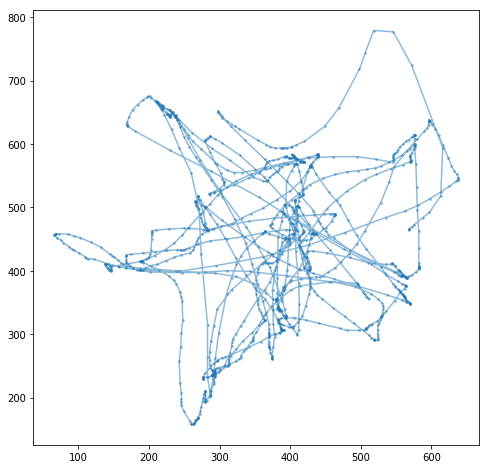

In [17]:
plt.figure(1,figsize=(8,8))
#im = plt.imread("C:/Users/DaBoss/DocumentsGitHub/clickdamole/images/moles.png")
#implot = plt.imshow(im, alpha=.5)
plt.plot(xs, ys, alpha=.5)
plt.scatter(xs, ys, alpha=.4, s=3)

#### Simple Regression

In [18]:
numeric_table = df4.copy()
numeric_table = numeric_table.drop(['Xcord','Ycord', 'Timemousecords', 'timestimsarrive','IDs'],axis=1)
numeric_table = numeric_table.convert_objects(convert_numeric=True)
# TODO: Use pd.to_numeric above

C:\Users\meyer\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until


Set up model

In [19]:
target = pd.DataFrame(numeric_table.Q2, columns=['Q2'])
X=numeric_table['accratio']
x=X.tolist()
Y=target['Q2']
y=Y.tolist()

In [20]:
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     53.32
Date:                Sun, 15 Apr 2018   Prob (F-statistic):           8.32e-10
Time:                        23:42:07   Log-Likelihood:                -143.15
No. Observations:                  60   AIC:                             288.3
Df Residuals:                      59   BIC:                             290.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             4.2570      0.583      7.302      0.000       3.090       5.423
==============================================================================
Omnibus:                       13.570   Durbin-Watson:                   0.351
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                4.572
Skew:                          -0.366   Prob(JB):                        0.102
Kurtosis:                       1.863   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
model.pvalues

array([8.32113019e-10])

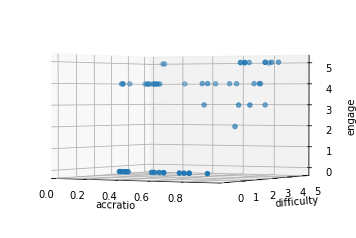

In [22]:
#for color but havent done this yet
engagement = numeric_table['Q2'].tolist()
difficulty = numeric_table['Q1'].tolist()
accuracy = numeric_table['accratio'].tolist()
threedee = plt.figure().gca(projection='3d')
threedee.scatter(accuracy, difficulty, engagement)
threedee.set_xlabel('accratio')
threedee.set_zlabel('engage')
threedee.set_ylabel('difficulty')
threedee.view_init(azim=0)
threedee.view_init(elev=1)

plt.show()


In [23]:
##trying to fit multiple regression
import statsmodels.formula.api as smf

mX = numeric_table[['Q1', 'accratio']]

my = numeric_table['Q2']
## fit a OLS model with intercept on TV and Radio

mX = sm.add_constant(X)

In [24]:
# Engagement predicted by accuracy ratio, controlling for difficulty

In [25]:
Mest = sm.OLS(my, mX).fit()
Mest = smf.ols(formula='Q2 ~ accratio * Q1', data=numeric_table).fit()

Mest.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Q2   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     310.1
Date:                Sun, 15 Apr 2018   Prob (F-statistic):           7.69e-35
Time:                        23:42:17   Log-Likelihood:                -38.826
No. Observations:                  60   AIC:                             85.65
Df Residuals:                      56   BIC:                             94.03
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.6487      0.378      1.718      0.091      -0.108       1.405
accratio       -1.0142      0.617     -1.643      0.106      -2.251       0.223
Q1              0.8705      0.100      8.737      0.000       0.671       1.070
accratio:Q1     0.3476      0.165      2.106      0.040       0.017       0.678
==============================================================================
Omnibus:                        3.288   Durbin-Watson:                   1.295
Prob(Omnibus):                  0.193   Jarque-Bera (JB):                2.481
Skew:                          -0.307   Prob(JB):                        0.289
Kurtosis:                       3.785   Cond. No.                         46.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
Mest.pvalues

Intercept      9.136012e-02
accratio       1.060334e-01
Q1             4.817691e-12
accratio:Q1    3.973595e-02
dtype: float64

TODO: Add notes about dependent variables
Suggestions.  

error rate / number of misses

how_long (num points)
mean velocity (between point distance). Later color with velocity.
mean acceleration (differences between successive velocity values). Later color with acceleration.
curvature: https://stackoverflow.com/questions/27095399/how-do-i-calculate-radius-of-curvature-from-discrete-samples

look at the open sesame library for what they have

check those spivey notes



In [27]:
row_number = 10
xs = [int(i)-100 for i in df4.at[row_number,'Xcord'].split(',')]  
ys = [int(i) for i in df4.at[row_number,'Ycord'].split(',')] 

velocX = []

for i in range(0,len(xs)-1):
    velocX.append(xs[i] - xs[i + 1])

np.mean(velocX)

0.13646702047005307

In [28]:
import math

In [29]:
# Compute velocities
row_number = 11
xs = [int(i) for i in df4.at[row_number,'Xcord'].split(',')]  
ys = [int(i) for i in df4.at[row_number,'Ycord'].split(',')] 

velocX = []
velocY = []
for i in range(0,len(xs)-1):
    velocX.append(xs[i] - xs[i + 1])
for i in range(0,len(ys)-1):
    velocY.append(ys[i] - ys[i + 1])

In [30]:
print("mean vx = {} mean vy = {}".format(np.mean(velocX),np.mean(velocY)))

mean vx = 0.29219143576826195 mean vy = 0.03526448362720403


In [31]:
# Trying to figure
velocity = []
for i in range(0,len(velocY)):
    velocity.append((velocX[i]**2 + velocY[i]**2)**.5)
    #print((velocX[i]**2 + velocY[i]**2)**.5)

print(velocX[0:5])
print(velocY[0:5])
print(velocity[0:5])

print(((-3)**2 + 5**2)**.5)
print((velocX[1]**2 + velocY[1]**2)**.5)

velocity1 = []
for i in range(0,len(velocY)):
    velocity1.append(math.sqrt(math.pow(velocX[i], 2) + math.pow(velocY[i], 2)))
    #print((velocX[i]**2 + velocY[i]**2)**.5)

print(velocX[0:5])
print(velocY[0:5])
print(velocity[0:5])

print(math.sqrt(math.pow(-3, 2) + math.pow(5, 2)))
print(math.sqrt(math.pow(velocX[1], 2) + math.pow(velocY[1], 2)))


[0, -1, 0, 1, 6]
[-1, 0, 1, 0, -5]
[1.0, 1.0, 1.0, 1.0, 7.810249675906654]
5.830951894845301
1.0
[0, -1, 0, 1, 6]
[-1, 0, 1, 0, -5]
[1.0, 1.0, 1.0, 1.0, 7.810249675906654]
5.830951894845301
1.0


In [32]:
# Make a list of velocities
velocities = []
for x in range(0,len((df4.index)-1)):
    xs = [int(i) for i in df4.at[x,'Xcord'].split(',')]  
    ys = [int(i) for i in df4.at[x,'Ycord'].split(',')] 
    velocity1 = []
    for i in range(0,len(velocY)):
        velocity1.append(math.sqrt(math.pow(velocX[i], 2) + math.pow(velocY[i], 2)))
    velocities.append(velocity1)

series = pd.Series(velocities)
df4['velocities'] = series.values

In [33]:
# df4.head()

In [34]:
# TODO: Order columns in a nice way: ID, raw mouse data, Qs, and then DVs

In [35]:
# Make a list of velocities
velocities = []
for index, row in df4.iterrows():
#     print(row['Xcord'])
    xs = [int(i) for i in row["Xcord"].split(',')]  
    #print(xs)
#     xs = [int(i) for i in df4.at[x,'Xcord'].split(',')]  
#     ys = [int(i) for i in df4.at[x,'Ycord'].split(',')] 
#     velocity1 = []
#     for i in range(0,len(velocY)):
#         velocity1.append(math.sqrt(math.pow(velocX[i], 2) + math.pow(velocY[i], 2)))
#     velocities.append(velocity1)

# series = pd.Series(velocities)
# df4['velocities'] = series.values

In [36]:
import math

velocities = []
for index, row in df4.iterrows():
    velocX = []
    velocY = []
    velocity1 = []
    xs = [int(i) for i in row["Xcord"].split(',')] 
    ys = [int(i) for i in row["Ycord"].split(',')] 
    for i in range(0,len(xs)-1):
        velocX.append(xs[i] - xs[i + 1])
    for i in range(0,len(ys)-1):
        velocY.append(ys[i] - ys[i + 1])
    for i in range(0,len(velocY)):
        velocity1.append(math.sqrt(math.pow(velocX[i], 2) + math.pow(velocY[i], 2)))
    velocities.append(velocity1)

series = pd.Series(velocities)
df4['velocities'] = series.values
df4.head()

,accratio,Xcord,Ycord,Timemousecords,timestimsarrive,difficultylevel,stimsclicked,stimsshown,mouseCordsYClicks,mouseCordsXClicks,IDs,Q1,Q2,Q3,velocities
0,0.3559322033898305,"329,329,330,330,333,333,339,339,346,346,352,35...","611,611,606,606,599,599,590,590,580,580,570,57...","1523251854477,1523251854478,1523251854495,1523...","1523251854384,1523251855038,1523251855689,1523...",3,21,59,"612,329,497,374,423,516,507,357,318,468,520,34...","""",anon,4,4,2,"[0.0, 5.0990195135927845, 0.0, 7.6157731058639..."
1,0.18181818181818182,"672,657,656,656,655,655,654,654,653,653,652,65...","477,477,477,477,477,477,477,477,477,477,477,47...","1523251923132,1523251923133,1523251923151,1523...","1523251922798,1523251923454,1523251924106,1523...",4,16,88,"310,476,321,483,414,519,419,519,419,519,480,35...","""",anon,4,4,3,"[15.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0,..."
2,0.19101123595505617,"639,639,638,638,637,637,634,634,631,631,628,62...","474,474,474,474,474,474,474,474,474,474,474,47...","1523251997953,1523251997954,1523251997986,1523...","1523251997707,1523251998362,1523251999013,1523...",5,17,89,"573,522,572,522,572,522,383,279,383,279,383,27...","""",anon,4,4,3,"[0.0, 1.0, 0.0, 1.0, 0.0, 3.0, 0.0, 3.0, 0.0, ..."
3,0.16091954022988506,"638,637,637,636,630,629,629,628,628,627,627,62...","474,474,474,473,471,471,471,471,471,471,471,47...","1523252066264,1523252066472,1523252066472,1523...","1523252066010,1523252066665,1523252067318,1523...",6,14,87,"321,463,337,468,439,509,435,510,333,633,336,63...","""",anon,4,4,2,"[1.0, 0.0, 1.4142135623730951, 6.3245553203367..."
4,0.4117647058823529,"306,309,329,368,399,426,450,468,479,488,491,49...","645,640,613,560,523,493,466,447,434,409,398,38...","1523250328096,1523250328110,1523250328126,1523...","1523250327449,1523250328100,1523250329223,1523...",3,21,51,"646,306,331,480,452,517,577,355,528,376,296,45...","""","YxXvWlCiO8Pd""",0,0,0,"[5.830951894845301, 33.60059523282288, 65.8027..."


In [37]:
Todo
#fix mouse loggin bug cuz rn theyre all the same
#build mutilevel model

two new bugs
#whatever hapened to mom
#why do I have so many more times than x and y cords

SyntaxError: invalid syntax (<ipython-input-37-8130c9f1f726>, line 5)

In [38]:

accelerations = []
for index, row in df4.iterrows():
    acc = []
    vs = [i for i in row["velocities"]] 
    for i in range(0,len(vs)-1):
        acc.append(vs[i] - vs[i + 1])
        #print(vs[i] - vs[i + 1])
        #print(vs[i])
        #print(vs[i + 1])
        #print("line")
    accelerations.append(acc)
    #break
#print(df4.iloc[1,"velocities"])
seriesacc = pd.Series(accelerations)
df4['accelerations'] = seriesacc.values
df4.head()

,accratio,Xcord,Ycord,Timemousecords,timestimsarrive,difficultylevel,stimsclicked,stimsshown,mouseCordsYClicks,mouseCordsXClicks,IDs,Q1,Q2,Q3,velocities,accelerations
0,0.3559322033898305,"329,329,330,330,333,333,339,339,346,346,352,35...","611,611,606,606,599,599,590,590,580,580,570,57...","1523251854477,1523251854478,1523251854495,1523...","1523251854384,1523251855038,1523251855689,1523...",3,21,59,"612,329,497,374,423,516,507,357,318,468,520,34...","""",anon,4,4,2,"[0.0, 5.0990195135927845, 0.0, 7.6157731058639...","[-5.0990195135927845, 5.0990195135927845, -7.6..."
1,0.18181818181818182,"672,657,656,656,655,655,654,654,653,653,652,65...","477,477,477,477,477,477,477,477,477,477,477,47...","1523251923132,1523251923133,1523251923151,1523...","1523251922798,1523251923454,1523251924106,1523...",4,16,88,"310,476,321,483,414,519,419,519,419,519,480,35...","""",anon,4,4,3,"[15.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0,...","[14.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -..."
2,0.19101123595505617,"639,639,638,638,637,637,634,634,631,631,628,62...","474,474,474,474,474,474,474,474,474,474,474,47...","1523251997953,1523251997954,1523251997986,1523...","1523251997707,1523251998362,1523251999013,1523...",5,17,89,"573,522,572,522,572,522,383,279,383,279,383,27...","""",anon,4,4,3,"[0.0, 1.0, 0.0, 1.0, 0.0, 3.0, 0.0, 3.0, 0.0, ...","[-1.0, 1.0, -1.0, 1.0, -3.0, 3.0, -3.0, 3.0, -..."
3,0.16091954022988506,"638,637,637,636,630,629,629,628,628,627,627,62...","474,474,474,473,471,471,471,471,471,471,471,47...","1523252066264,1523252066472,1523252066472,1523...","1523252066010,1523252066665,1523252067318,1523...",6,14,87,"321,463,337,468,439,509,435,510,333,633,336,63...","""",anon,4,4,2,"[1.0, 0.0, 1.4142135623730951, 6.3245553203367...","[1.0, -1.4142135623730951, -4.910341757963664,..."
4,0.4117647058823529,"306,309,329,368,399,426,450,468,479,488,491,49...","645,640,613,560,523,493,466,447,434,409,398,38...","1523250328096,1523250328110,1523250328126,1523...","1523250327449,1523250328100,1523250329223,1523...",3,21,51,"646,306,331,480,452,517,577,355,528,376,296,45...","""","YxXvWlCiO8Pd""",0,0,0,"[5.830951894845301, 33.60059523282288, 65.8027...","[-27.769643337977584, -32.20214027262553, 17.5..."


In [39]:
print(df4.iloc[1,12])

4


In [40]:
speed = df4.at[0,'velocities']
accel = df4.at[0,'accelerations']
times = df4.at[0,'Timemousecords']
ts = [int(i) - 1521001300000 for i in df4.at[0,"Timemousecords"].split(',')] 
#xs = [int(i) for i in df4.at[row_number,'Xcord'].split(',')]  

#for i in times:
#    times[i] = times[i] - 1521001300000

#plt.plot(times, speed, color='g')
#plt.plot(times, accel, color='orange')
#plt.show()

In [41]:
#print(len(times))
#print(len(speed))
#print(len(accel))


30729
2194
2193
2674
2674


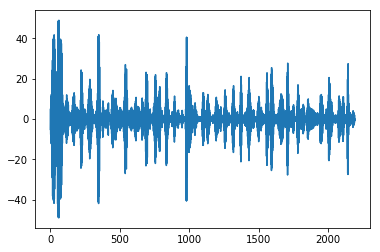

In [42]:
speed = df4.at[0,'velocities']
accel = df4.at[0,'accelerations']
times = df4.at[0,'Timemousecords']
xcordz = [int(i) for i in row["Xcord"].split(',')] 
ycordz = [int(i) for i in row["Ycord"].split(',')] 
ts = [int(i) - 1521001300000 for i in df4.at[0,"Timemousecords"].split(',')] 
print(len(times))
print(len(speed))
print(len(accel))
print(len(xcordz))
print(len(ycordz))

accelse = pd.Series(accel)
accelse.plot()
plt.show()
#plt.plot(times, speed, color='g')
#plt.plot(times, accel, color='orange')
#plt.show()

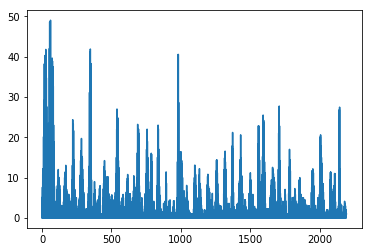

In [43]:
speedse = pd.Series(speed)
speedse.plot()
plt.show()

<function matplotlib.pyplot.show>

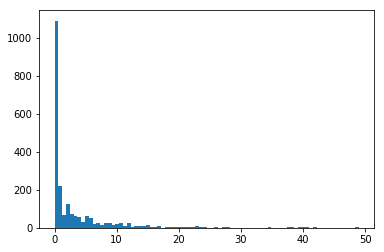

In [44]:
plt.hist(speedse, bins='auto')
plt.show

In [62]:
#weird problem here

idseries = df4[df4.columns[10]]
people = []
person = 0
people.append(person)
for i in range(1,len(idseries)): 
    if idseries[i] != idseries[i-1]:
        person += 1
    people.append(person)

personnumber = pd.Series(people)
df4['person'] = personnumber.values

In [63]:
df4.head()

,accratio,Xcord,Ycord,Timemousecords,timestimsarrive,difficultylevel,stimsclicked,stimsshown,mouseCordsYClicks,mouseCordsXClicks,IDs,Q1,Q2,Q3,velocities,accelerations,person
0,0.3559322033898305,"329,329,330,330,333,333,339,339,346,346,352,35...","611,611,606,606,599,599,590,590,580,580,570,57...","1523251854477,1523251854478,1523251854495,1523...","1523251854384,1523251855038,1523251855689,1523...",3,21,59,"612,329,497,374,423,516,507,357,318,468,520,34...","""",anon,4,4,2,"[0.0, 5.0990195135927845, 0.0, 7.6157731058639...","[-5.0990195135927845, 5.0990195135927845, -7.6...",0
1,0.18181818181818182,"672,657,656,656,655,655,654,654,653,653,652,65...","477,477,477,477,477,477,477,477,477,477,477,47...","1523251923132,1523251923133,1523251923151,1523...","1523251922798,1523251923454,1523251924106,1523...",4,16,88,"310,476,321,483,414,519,419,519,419,519,480,35...","""",anon,4,4,3,"[15.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0,...","[14.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -...",0
2,0.19101123595505617,"639,639,638,638,637,637,634,634,631,631,628,62...","474,474,474,474,474,474,474,474,474,474,474,47...","1523251997953,1523251997954,1523251997986,1523...","1523251997707,1523251998362,1523251999013,1523...",5,17,89,"573,522,572,522,572,522,383,279,383,279,383,27...","""",anon,4,4,3,"[0.0, 1.0, 0.0, 1.0, 0.0, 3.0, 0.0, 3.0, 0.0, ...","[-1.0, 1.0, -1.0, 1.0, -3.0, 3.0, -3.0, 3.0, -...",0
3,0.16091954022988506,"638,637,637,636,630,629,629,628,628,627,627,62...","474,474,474,473,471,471,471,471,471,471,471,47...","1523252066264,1523252066472,1523252066472,1523...","1523252066010,1523252066665,1523252067318,1523...",6,14,87,"321,463,337,468,439,509,435,510,333,633,336,63...","""",anon,4,4,2,"[1.0, 0.0, 1.4142135623730951, 6.3245553203367...","[1.0, -1.4142135623730951, -4.910341757963664,...",0
4,0.4117647058823529,"306,309,329,368,399,426,450,468,479,488,491,49...","645,640,613,560,523,493,466,447,434,409,398,38...","1523250328096,1523250328110,1523250328126,1523...","1523250327449,1523250328100,1523250329223,1523...",3,21,51,"646,306,331,480,452,517,577,355,528,376,296,45...","""","YxXvWlCiO8Pd""",0,0,0,"[5.830951894845301, 33.60059523282288, 65.8027...","[-27.769643337977584, -32.20214027262553, 17.5...",1


In [47]:
df4.to_csv("MyDataframestuff.csv")

In [48]:
pwd


'C:\\Users\\meyer\\Desktop'

In [49]:
ls

 Volume in drive C is OS
 Volume Serial Number is AE24-4B0D

 Directory of C:\Users\meyer\Desktop

04/15/2018  11:42 PM    <DIR>          .
04/15/2018  11:42 PM    <DIR>          ..
04/06/2018  01:40 PM    <DIR>          .ipynb_checkpoints
03/29/2018  04:05 PM            91,032 29511641_1795797633797850_588584591901644462_n.jpg
03/29/2018  04:06 PM            89,936 29570340_1795800020464278_7145390600392286019_n.jpg
03/05/2018  04:23 PM         1,414,794 7z1801-x64.exe
01/16/2018  01:07 PM            38,861 Assmt_1.pdf
02/08/2018  12:56 PM            58,302 Assmt_2.pdf
02/08/2018  12:56 PM            67,479 Assmt_3.pdf
11/10/2017  01:18 PM    <DIR>          books
11/15/2017  02:54 PM           505,383 BurkhartEtAl2009-CooperativeBreedingHumanCognitiveEvolution (1).pdf
11/12/2017  10:37 PM           505,383 BurkhartEtAl2009-CooperativeBreedingHumanCognitiveEvolution.pdf
03/05/2018  04:24 PM    <DIR>          Champions of Norrath
03/05/2018  04:15 PM       368,815,346 Champions of Norra

(array([16.,  0.,  1.,  0.,  0.,  4.,  0., 25.,  0., 14.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

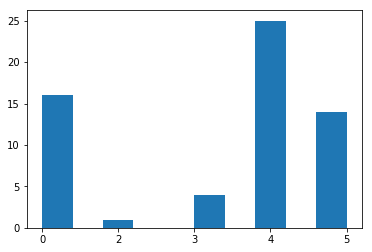

In [50]:

EngQ2 = df4['Q2']
EngQ2 = pd.Series(EngQ2)
plt.hist(EngQ2)

In [51]:
df4.head()


,accratio,Xcord,Ycord,Timemousecords,timestimsarrive,difficultylevel,stimsclicked,stimsshown,mouseCordsYClicks,mouseCordsXClicks,IDs,Q1,Q2,Q3,velocities,accelerations,person
0,0.3559322033898305,"329,329,330,330,333,333,339,339,346,346,352,35...","611,611,606,606,599,599,590,590,580,580,570,57...","1523251854477,1523251854478,1523251854495,1523...","1523251854384,1523251855038,1523251855689,1523...",3,21,59,"612,329,497,374,423,516,507,357,318,468,520,34...","""",anon,4,4,2,"[0.0, 5.0990195135927845, 0.0, 7.6157731058639...","[-5.0990195135927845, 5.0990195135927845, -7.6...",1
1,0.18181818181818182,"672,657,656,656,655,655,654,654,653,653,652,65...","477,477,477,477,477,477,477,477,477,477,477,47...","1523251923132,1523251923133,1523251923151,1523...","1523251922798,1523251923454,1523251924106,1523...",4,16,88,"310,476,321,483,414,519,419,519,419,519,480,35...","""",anon,4,4,3,"[15.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0,...","[14.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -...",1
2,0.19101123595505617,"639,639,638,638,637,637,634,634,631,631,628,62...","474,474,474,474,474,474,474,474,474,474,474,47...","1523251997953,1523251997954,1523251997986,1523...","1523251997707,1523251998362,1523251999013,1523...",5,17,89,"573,522,572,522,572,522,383,279,383,279,383,27...","""",anon,4,4,3,"[0.0, 1.0, 0.0, 1.0, 0.0, 3.0, 0.0, 3.0, 0.0, ...","[-1.0, 1.0, -1.0, 1.0, -3.0, 3.0, -3.0, 3.0, -...",1
3,0.16091954022988506,"638,637,637,636,630,629,629,628,628,627,627,62...","474,474,474,473,471,471,471,471,471,471,471,47...","1523252066264,1523252066472,1523252066472,1523...","1523252066010,1523252066665,1523252067318,1523...",6,14,87,"321,463,337,468,439,509,435,510,333,633,336,63...","""",anon,4,4,2,"[1.0, 0.0, 1.4142135623730951, 6.3245553203367...","[1.0, -1.4142135623730951, -4.910341757963664,...",1
4,0.4117647058823529,"306,309,329,368,399,426,450,468,479,488,491,49...","645,640,613,560,523,493,466,447,434,409,398,38...","1523250328096,1523250328110,1523250328126,1523...","1523250327449,1523250328100,1523250329223,1523...",3,21,51,"646,306,331,480,452,517,577,355,528,376,296,45...","""","YxXvWlCiO8Pd""",0,0,0,"[5.830951894845301, 33.60059523282288, 65.8027...","[-27.769643337977584, -32.20214027262553, 17.5...",2


In [64]:
import pymc3 as pm

with pm.Model() as hierarchical_model:
    # Hyperpriors
    mu_a = pm.Normal('mu_alpha', mu=0., sd=1)
    sigma_a = pm.HalfCauchy('sigma_alpha', beta=1)
    mu_b = pm.Normal('mu_beta', mu=0., sd=1)
    sigma_b = pm.HalfCauchy('sigma_beta', beta=1)
    
    # Intercept for each county, distributed around group mean mu_a
    a = pm.Normal('alpha', mu=mu_a, sd=sigma_a, shape=len(df4.person.unique()))
    # Intercept for each county, distributed around group mean mu_a
    b = pm.Normal('beta', mu=mu_b, sd=sigma_b, shape=len(df4.person.unique()))
    
    # Model error
    eps = pm.HalfCauchy('eps', beta=1)
    
    # Expected value
    eng_est = a[people] + b[people] * df4.accratio.values
    
    # Data likelihood
    y_like = pm.Normal('y_like', mu=eng_est, sd=eps, observed=df4.Q2)

TypeError: can't multiply sequence by non-int of type 'TensorVariable'

In [56]:
df4.head()

,accratio,Xcord,Ycord,Timemousecords,timestimsarrive,difficultylevel,stimsclicked,stimsshown,mouseCordsYClicks,mouseCordsXClicks,IDs,Q1,Q2,Q3,velocities,accelerations,person
0,0.3559322033898305,"329,329,330,330,333,333,339,339,346,346,352,35...","611,611,606,606,599,599,590,590,580,580,570,57...","1523251854477,1523251854478,1523251854495,1523...","1523251854384,1523251855038,1523251855689,1523...",3,21,59,"612,329,497,374,423,516,507,357,318,468,520,34...","""",anon,4,4,2,"[0.0, 5.0990195135927845, 0.0, 7.6157731058639...","[-5.0990195135927845, 5.0990195135927845, -7.6...",1
1,0.18181818181818182,"672,657,656,656,655,655,654,654,653,653,652,65...","477,477,477,477,477,477,477,477,477,477,477,47...","1523251923132,1523251923133,1523251923151,1523...","1523251922798,1523251923454,1523251924106,1523...",4,16,88,"310,476,321,483,414,519,419,519,419,519,480,35...","""",anon,4,4,3,"[15.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0,...","[14.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -...",1
2,0.19101123595505617,"639,639,638,638,637,637,634,634,631,631,628,62...","474,474,474,474,474,474,474,474,474,474,474,47...","1523251997953,1523251997954,1523251997986,1523...","1523251997707,1523251998362,1523251999013,1523...",5,17,89,"573,522,572,522,572,522,383,279,383,279,383,27...","""",anon,4,4,3,"[0.0, 1.0, 0.0, 1.0, 0.0, 3.0, 0.0, 3.0, 0.0, ...","[-1.0, 1.0, -1.0, 1.0, -3.0, 3.0, -3.0, 3.0, -...",1
3,0.16091954022988506,"638,637,637,636,630,629,629,628,628,627,627,62...","474,474,474,473,471,471,471,471,471,471,471,47...","1523252066264,1523252066472,1523252066472,1523...","1523252066010,1523252066665,1523252067318,1523...",6,14,87,"321,463,337,468,439,509,435,510,333,633,336,63...","""",anon,4,4,2,"[1.0, 0.0, 1.4142135623730951, 6.3245553203367...","[1.0, -1.4142135623730951, -4.910341757963664,...",1
4,0.4117647058823529,"306,309,329,368,399,426,450,468,479,488,491,49...","645,640,613,560,523,493,466,447,434,409,398,38...","1523250328096,1523250328110,1523250328126,1523...","1523250327449,1523250328100,1523250329223,1523...",3,21,51,"646,306,331,480,452,517,577,355,528,376,296,45...","""","YxXvWlCiO8Pd""",0,0,0,"[5.830951894845301, 33.60059523282288, 65.8027...","[-27.769643337977584, -32.20214027262553, 17.5...",2
